<a href="https://colab.research.google.com/github/P146667-YANGFANGJIN/DATA_MANAGEMENT/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Bank GDP & Inflation Analysis (2000–2023)
This notebook explores global economic indicators using GDP per capita and inflation data from the World Bank.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data
import pandas as pd

## Upload files manually or use drive mount
inflation = pd.read_csv("/content/drive/MyDrive/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_85166.csv", skiprows=4)
gdp = pd.read_csv("/content/drive/MyDrive/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_85121.csv", skiprows=4)

## Drop irrelevant columns
gdp.drop(columns=["2024", "Unnamed: 69"], inplace=True, errors='ignore')
inflation.drop(columns=["2024", "Unnamed: 69"], inplace=True, errors='ignore')

## Melt to long format
gdp_long = gdp.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="gdp_value"
)

inflation_long = inflation.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="inflation_value"
)


## Convert year to int
gdp_long = gdp_long[gdp_long["Year"].str.isdigit()].copy()
gdp_long["Year"] = gdp_long["Year"].astype(int)
inflation_long = inflation_long[inflation_long["Year"].str.isdigit()].copy()
inflation_long["Year"] = inflation_long["Year"].astype(int)

## Merge both
df = pd.merge(
    gdp_long,
    inflation_long,
    on=["Country Name", "Country Code", "Year"],
    how="inner"
)

## Rename columns for clarity
df.rename(columns={
    "gdp_value": "GDP_per_capita",
    "inflation_value": "Inflation"
}, inplace=True)

## Filter from year 2000 onwards
df = df[df["Year"] >= 2000]
df.head()



,Country Name,Country Code,Year,GDP_per_capita,Inflation
10640,Aruba,ABW,2000,20681.023027,4.044021
10641,Africa Eastern and Southern,AFE,2000,707.120376,8.601485
10642,Afghanistan,AFG,2000,174.930991,NaN
10643,Africa Western and Central,AFW,2000,516.932316,2.530775
10644,Angola,AGO,2000,563.733796,324.996872


# **2. Global Scatter Plot (2000-2023)**


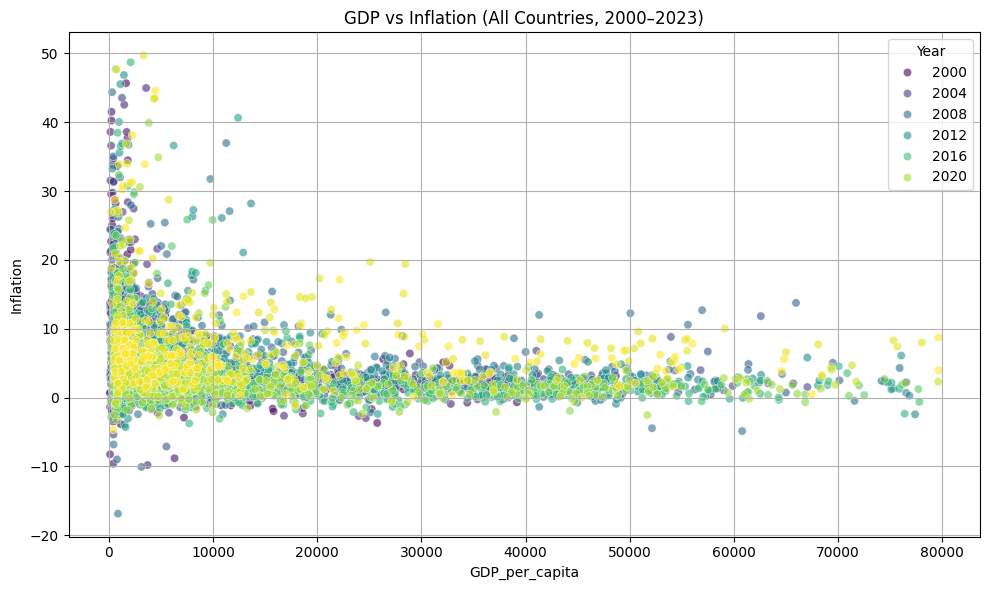

In [ ]:
## Remove extreme outliers and NaNs
filtered = df.dropna()
filtered = filtered[(filtered["GDP_per_capita"] < 80000) & (filtered["Inflation"].between(-20, 50))]

plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered, x="GDP_per_capita", y="Inflation", hue="Year", palette="viridis", alpha=0.6)
plt.title("GDP vs Inflation (All Countries, 2000–2023)")
plt.grid(True)
plt.tight_layout()
plt.show()



## **3. World Map: GDP per Capita in 2023**

In [ ]:

import plotly.express as px
gdp_2023_map = df[(df["Year"] == 2023) & (~df["GDP_per_capita"].isna())]

fig = px.choropleth(
    gdp_2023_map,
    locations="Country Code",
    color="GDP_per_capita",
    hover_name="Country Name",
    color_continuous_scale="Blues",
    title="World GDP per Capita in 2023 (Current US$)"
)
fig.update_layout(geo=dict(showframe=False, projection_type='natural earth'))
fig.show()


# **4. ASEAN-10 country**


## 4.1 **Line Chart**: *GDP per Capita* & *Inflation Rate*

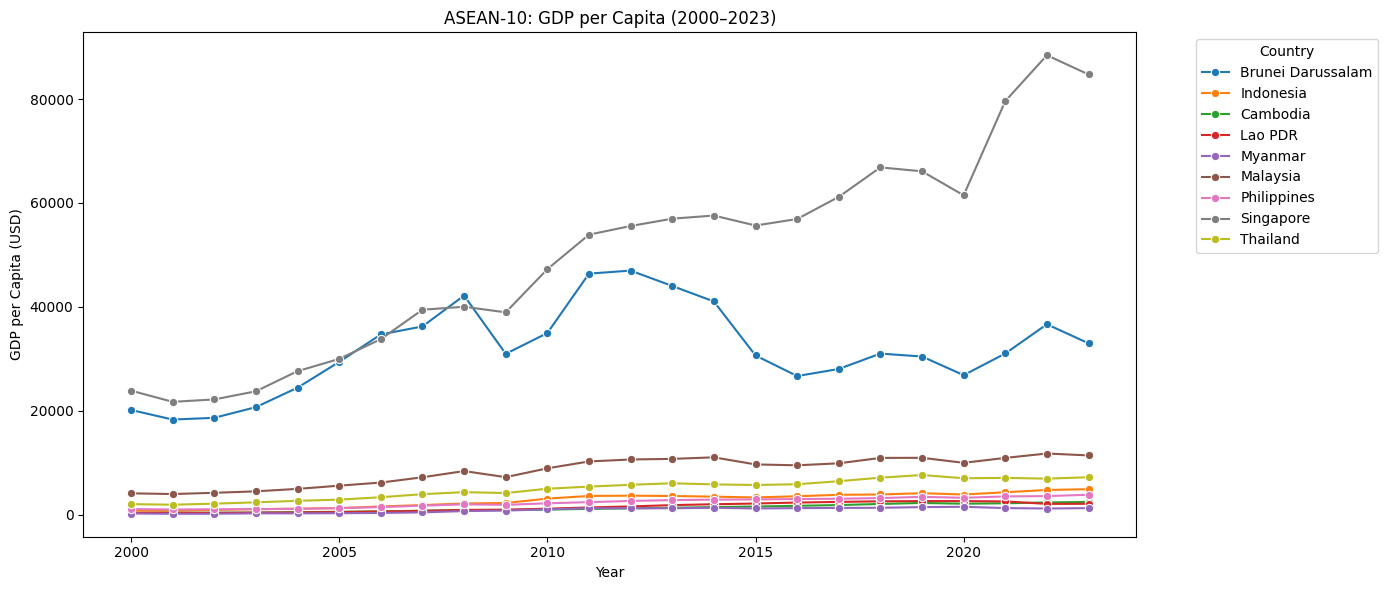

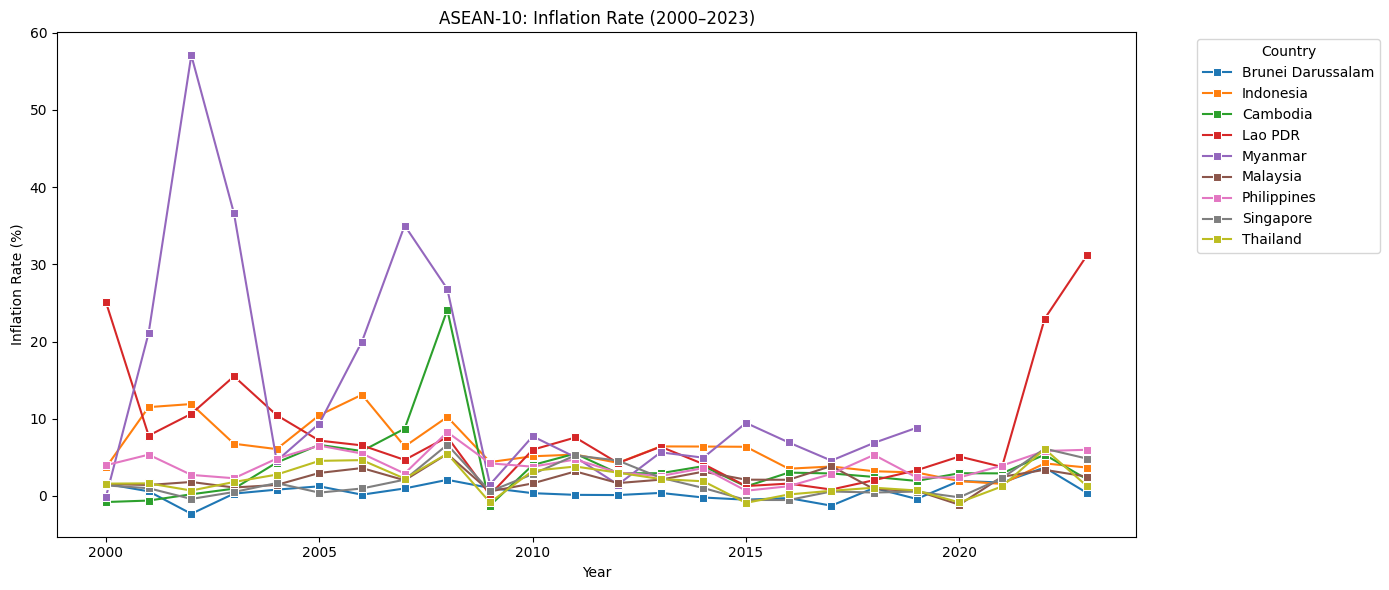

In [ ]:

asean_countries = [
    "Malaysia", "Singapore", "Thailand", "Indonesia", "Philippines",
    "Vietnam", "Brunei Darussalam", "Cambodia", "Lao PDR", "Myanmar"
]
asean_df = df[
    (df["Country Name"].isin(asean_countries))
]
# GDP per capita trend plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=asean_df, x="Year", y="GDP_per_capita", hue="Country Name", marker='o')
plt.title("ASEAN-10: GDP per Capita (2000–2023)")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Inflation rate trend plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=asean_df, x="Year", y="Inflation", hue="Country Name", marker='s')
plt.title("ASEAN-10: Inflation Rate (2000–2023)")
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4.2 **Heatmap**: *GDP* & *Inflation*

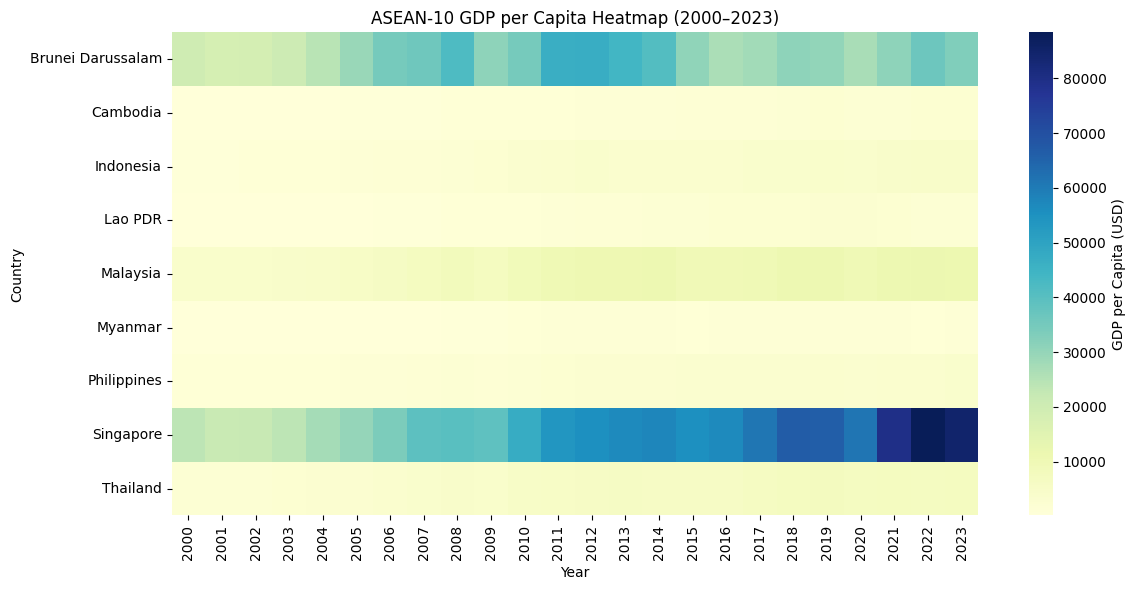

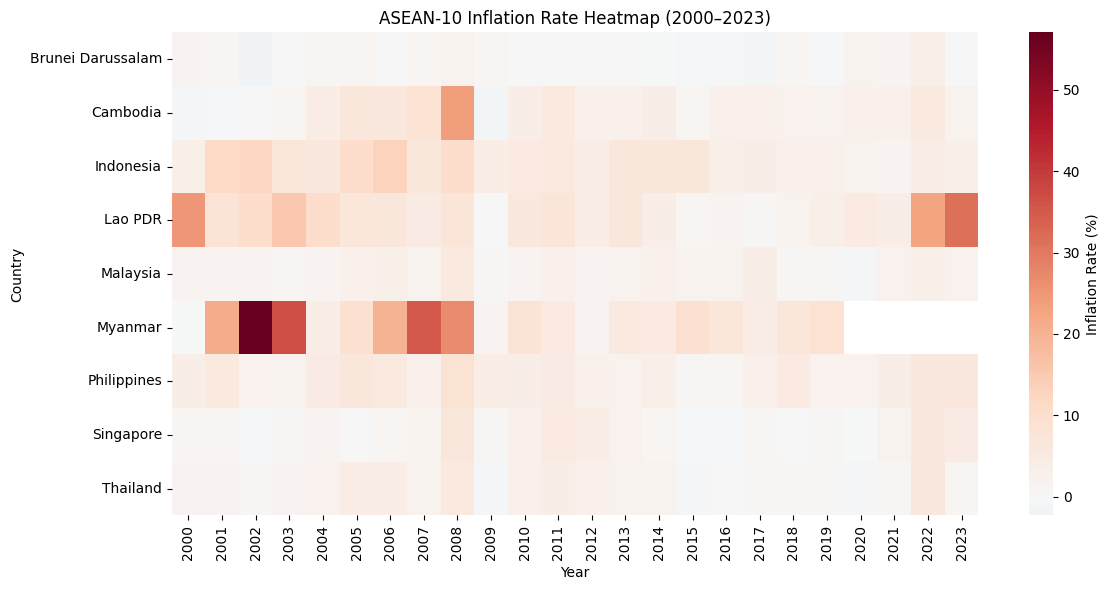

In [ ]:

asean_gdp_pivot = asean_df.pivot_table(index="Country Name", columns="Year", values="GDP_per_capita")
asean_inflation_pivot = asean_df.pivot_table(index="Country Name", columns="Year", values="Inflation")

# Convert to float to avoid heatmap errors
asean_gdp_pivot = asean_gdp_pivot.astype(float)
asean_inflation_pivot = asean_inflation_pivot.astype(float)

# GDP Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(asean_gdp_pivot, cmap="YlGnBu", cbar_kws={"label": "GDP per Capita (USD)"})
plt.title("ASEAN-10 GDP per Capita Heatmap (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Inflation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(asean_inflation_pivot, cmap="RdBu_r", center=0, cbar_kws={"label": "Inflation Rate (%)"})
plt.title("ASEAN-10 Inflation Rate Heatmap (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



# 5. Malaysia Economic

## 5.1 Malaysia *GDP* vs *Inflation* (2000–2023)

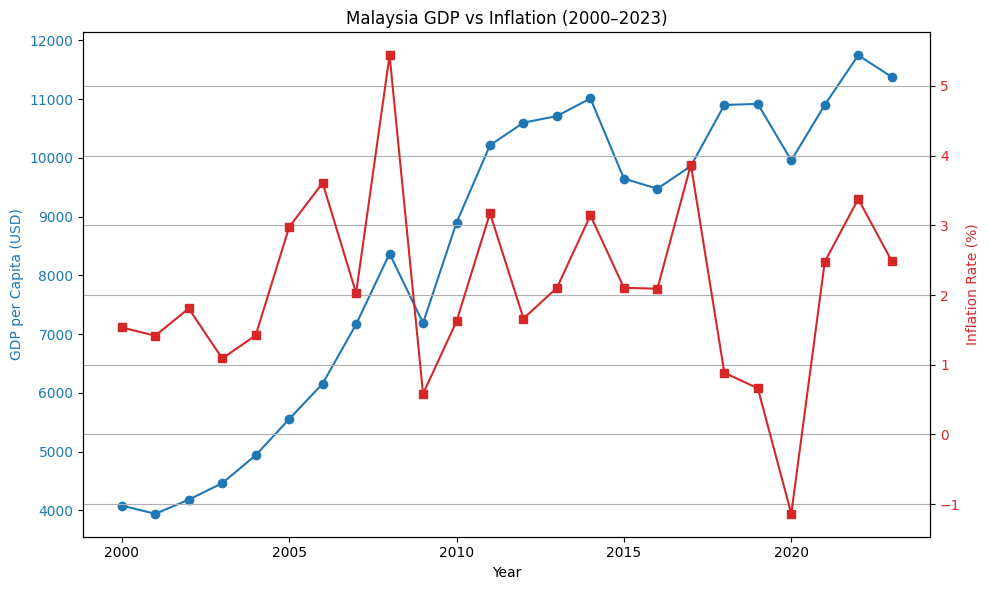

In [ ]:

malaysia = df[df["Country Name"] == "Malaysia"]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per Capita (USD)", color='tab:blue')
ax1.plot(malaysia["Year"], malaysia["GDP_per_capita"], color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel("Inflation Rate (%)", color='tab:red')
ax2.plot(malaysia["Year"], malaysia["Inflation"], color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title("Malaysia GDP vs Inflation (2000–2023)")
plt.tight_layout()
plt.grid(True)
plt.show()


## 5.2 Malaysia *Year-on-Year GDP per Capita Growth Rate (%)*

<ipython-input-54-872579702a5d>:3: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



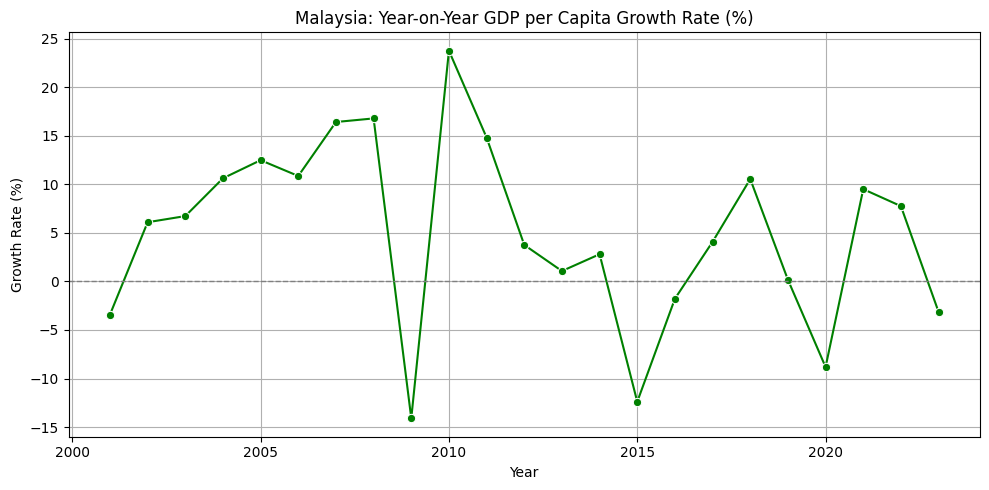

In [ ]:
# Sort and calculate YoY GDP growth rate
malaysia_growth = df[df["Country Name"] == "Malaysia"].sort_values("Year").copy()
malaysia_growth["GDP_Growth_Rate"] = malaysia_growth["GDP_per_capita"].pct_change() * 100

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=malaysia_growth, x="Year", y="GDP_Growth_Rate", marker='o', color='green')
plt.axhline(0, linestyle="--", color="gray", linewidth=1)
plt.title("Malaysia: Year-on-Year GDP per Capita Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 5.3 Malaysia: GDP vs Inflation Area Difference

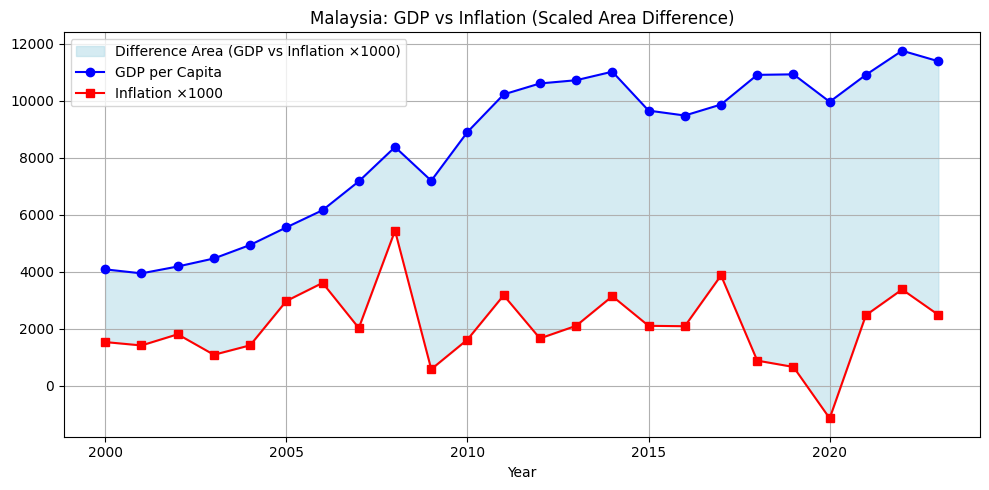

In [ ]:
# Prepare data: drop missing, convert to float, scale inflation
malaysia_valid = df[df["Country Name"] == "Malaysia"][["Year", "GDP_per_capita", "Inflation"]].dropna()
malaysia_valid["GDP_per_capita"] = pd.to_numeric(malaysia_valid["GDP_per_capita"], errors="coerce")
malaysia_valid["Inflation"] = pd.to_numeric(malaysia_valid["Inflation"], errors="coerce")
malaysia_valid = malaysia_valid.dropna()

# Extract as numpy arrays for plotting
years = malaysia_valid["Year"].values.astype(float)
gdp = malaysia_valid["GDP_per_capita"].values.astype(float)
inflation_scaled = (malaysia_valid["Inflation"] * 1000).values.astype(float)

# Plot area difference
plt.figure(figsize=(10, 5))
plt.fill_between(years, gdp, inflation_scaled, color='lightblue', alpha=0.5,
                 label='Difference Area (GDP vs Inflation ×1000)')
plt.plot(years, gdp, label="GDP per Capita", color="blue", marker='o')
plt.plot(years, inflation_scaled, label="Inflation ×1000", color="red", marker='s')
plt.title("Malaysia: GDP vs Inflation (Scaled Area Difference)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 5.4 Malaysia: Inflation Distribution by Decade

<ipython-input-56-18a34b2b1888>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




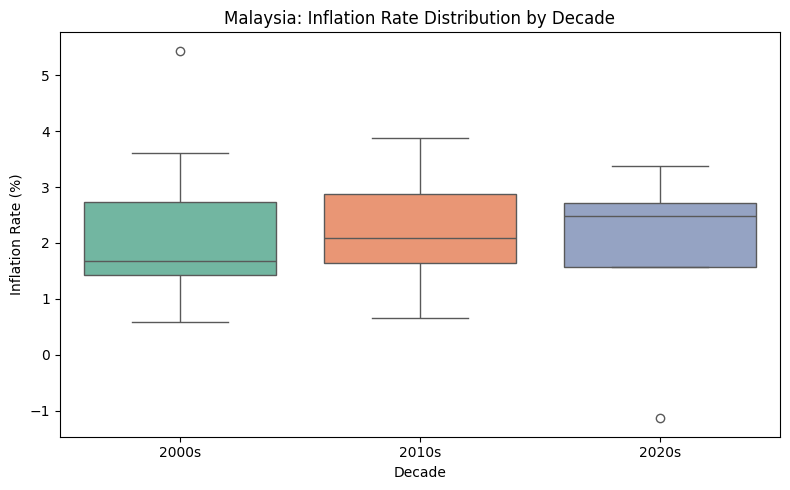

In [ ]:
# Prepare decade grouping
malaysia = df[df["Country Name"] == "Malaysia"].copy()
malaysia["Decade"] = malaysia["Year"].apply(lambda y: f"{y//10*10}s")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=malaysia, x="Decade", y="Inflation", palette="Set2")
plt.title("Malaysia: Inflation Rate Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel("Inflation Rate (%)")
plt.tight_layout()
plt.show()


In [ ]:
## ✅ 5. Insights
# - Malaysia's GDP increased steadily, dip in 2020 (COVID)
# - Inflation had small spikes in 2008 and post-2021
# - Across countries, high GDP doesn't guarantee low inflation

# 6. Conclusion
##  Conclusion (Summary Insights)

This analysis explored the global and regional economic landscape using GDP per capita and inflation data from 2000 to 2023.

At the global level, we observed substantial variation in both GDP levels and inflation rates across countries, with no consistent inverse relationship between the two. Global crises such as the 2008 financial crash and the COVID-19 pandemic in 2020 left visible imprints in both indicators.

Regionally, ASEAN countries showed clear economic stratification. Singapore and Brunei consistently recorded the highest GDP per capita, while Malaysia held a strong mid-tier position with stable inflation performance. In contrast, several other ASEAN members experienced significant inflation volatility.

Focusing on Malaysia, we found steady GDP growth over two decades, interrupted only by major global disruptions. Inflation remained moderate and relatively well-controlled, and the dual-axis and growth-rate plots highlight both resilience and recovery capacity.

Overall, Malaysia appears economically stable within ASEAN, making it a valuable case for deeper longitudinal analysis.
